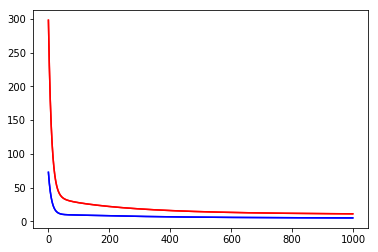

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split 

def Computecost(X,y,w,m):
    e = y - np.dot(X,w)
    J = 1/(2*m) * np.dot(e.T,e)
    return J

def gradientDescent(X,y,w,alpha,num_iters):
    m,n= np.shape(X)
    L_train = []
    L_validation = []
    for i in range(num_iters):
        J = Computecost(X,y,w,m)
        L_train.append(J)
        J = Computecost(X_test,y_test,w,m)
        L_validation.append(J)
        w = w + (alpha/m * np.dot((y - np.dot(X,w)).transpose(),X))
    return w,L_train,L_validation

##载入数据
x,y = load_svmlight_file("E:/housing_scale.txt")
x=x.toarray()
m, n = np.shape(x)
a=np.ones(m)
X=np.column_stack((x,a))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

w = np.zeros(n+1).transpose()
Iteration = range(1000)

w,L_train,L_validation =gradientDescent(X_train,y_train,w,0.01,1000) 

plt.plot(Iteration,L_train,'r')
plt.plot(Iteration,L_validation,'b')  
plt.show()

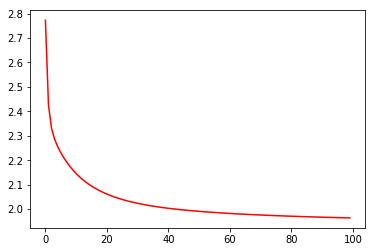

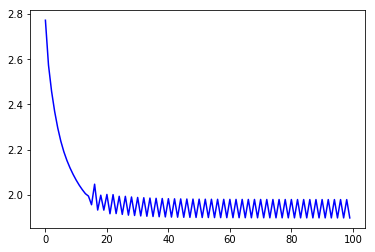

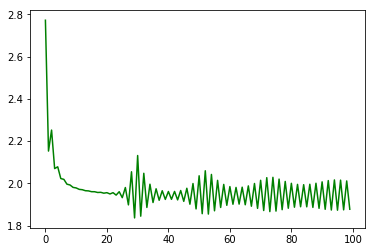

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file


def sigmoid(z):
    return 1/(1+np.exp(-z))

def Computecost(X,y,w,m):
    J = -1/m * np.sum((1+y_train).T*np.log(sigmoid(np.dot(X_train,w))) + (1-y_train).T*np.log(1-sigmoid(np.dot(X_train,w))))
    return J

def gradientDescent(X,y,w,alpha,num_iters):
    m,n= np.shape(X)
    L = []
    A = []
    for i in range(num_iters):
        J = Computecost(X_test,y_test,w,m_test)
        L.append(J)
        w = w + (alpha/m * np.dot((y - np.dot(X,w)).transpose(),X).T)
    return L

def Adadelta(X,y,w,p,e,num_iters):
    m,n = np.shape(X)
    L = []
    A = []
    Eg = np.zeros(n)
    exs = np.zeros(n)
    for i in range(num_iters):
        J = Computecost(X_test,y_test,w,m_test)
        L.append(J)
        g = 1/m * np.dot((y - np.dot(X,w)).transpose(),X).T
        Eg = p*(Eg)+(1-p)*(g**2)
        delta = (np.sqrt(exs**2 + e)/np.sqrt(Eg**2 + e))*(-g)
        exs = p*exs + (1-p)*delta**2
        w = w - delta
    return L

def RMSprop(X,y,w,alpha,e,num_iters):
    m,n = np.shape(X)
    L = []
    A = []
    Eg = np.zeros(n).T
    for i in range(num_iters):
        J = Computecost(X_test,y_test,w,m_test)
        L.append(J)
        g = 1/m * np.dot((y - np.dot(X,w)).transpose(),X).T
        Eg = 0.5 * (Eg+(g**2))
        RMS = np.sqrt(Eg + e)
        w = w + alpha/RMS * g
    return L
        

X_train,y_train = load_svmlight_file("E:/a9a_train.txt")
X_train = X_train.toarray()
X_test,y_test = load_svmlight_file("E:/a9a.txt")
X_test = X_test.toarray()
m_train, n_train = np.shape(X_train)
m_test,n_test = np.shape(X_test)
X_train = np.column_stack((X_train,np.ones(m_train).T))
X_test = np.column_stack((X_test,np.zeros(m_test).T))
X_test = np.column_stack((X_test,np.ones(m_test).T))
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
m_train, n_train = np.shape(X_train)
m_test,n_test = np.shape(X_test)

w = np.zeros(n_train).transpose()
Iteration = range(100)

L_NAG = gradientDescent(X_train,y_train,w,0.1,100)
L_Adadelta= Adadelta(X_train,y_train,w,0.95,1e-6,100)
L_RMSprop= RMSprop(X_train,y_train,w,0.01,1e-6,100)


plt.plot(Iteration,L_NAG,'r')
plt.show()
plt.plot(Iteration,L_RMSprop,'b')
plt.show()
plt.plot(Iteration,L_Adadelta,'g')
plt.show()